In [1]:
import numpy as np
import pandas as pd
#import lux
#lux.logger = True
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import scipy
from math import sqrt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
import time
import random
%matplotlib inline
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_excel('C:/Users/eng_a/Desktop/Masters Kuniv/Third semester/Thesis_app/Thesis_progress/comparing_handling_missing_values/Interpolation_Average_2013_2015.xlsx')

In [3]:
df = df.drop(['Unnamed: 0'], axis =1)
df = df.set_index('MeasurementDateTime')
df

,WD-Hour,WS-Hour,Temp-Hour,SR-Hour,RH-Hour,CO2,PM10,SO2,H2S,NO,NOX,NO2,O3,CO,THC
MeasurementDateTime,,,,,,,,,,,,,,,
2013-01-27 00:00:00,114.0,1.7,18.1,5.0,100.0,380.0,101.000000,0.001000,0.003,0.005,0.023,0.017000,2.600000e-02,0.58,2.170000
2013-01-27 01:00:00,151.0,0.4,17.8,3.0,89.0,410.0,101.000000,0.003000,0.017,0.065,0.151,0.086000,1.000000e-03,1.74,2.830000
2013-01-27 02:00:00,175.0,0.3,17.8,2.0,88.0,392.0,100.000000,0.002000,0.004,0.019,0.072,0.053000,2.000000e-03,0.95,3.770000
2013-01-27 03:00:00,264.0,0.8,16.8,2.0,92.0,403.0,92.000000,0.002000,0.014,0.051,0.123,0.072000,1.000000e-03,1.43,2.720000
2013-01-27 04:00:00,187.0,0.4,16.2,2.0,94.0,400.0,69.000000,0.002000,0.018,0.041,0.105,0.063000,1.000000e-03,1.32,2.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 18:00:00,85.0,1.4,14.6,10.0,76.0,404.0,344.238675,0.006386,0.008,0.014,0.081,0.076199,1.747050e-03,2.73,1.464756
2015-12-31 19:00:00,99.0,1.3,14.6,9.0,75.0,410.0,281.815817,0.006301,0.009,0.023,0.100,0.098153,1.108100e-04,2.81,1.903803
2015-12-31 20:00:00,210.0,0.7,14.5,10.0,79.0,424.0,51.079508,0.006520,0.009,0.064,0.164,0.106758,8.930000e-06,2.96,2.039618


C:\Users\eng_a\anaconda3\envs\gpu2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


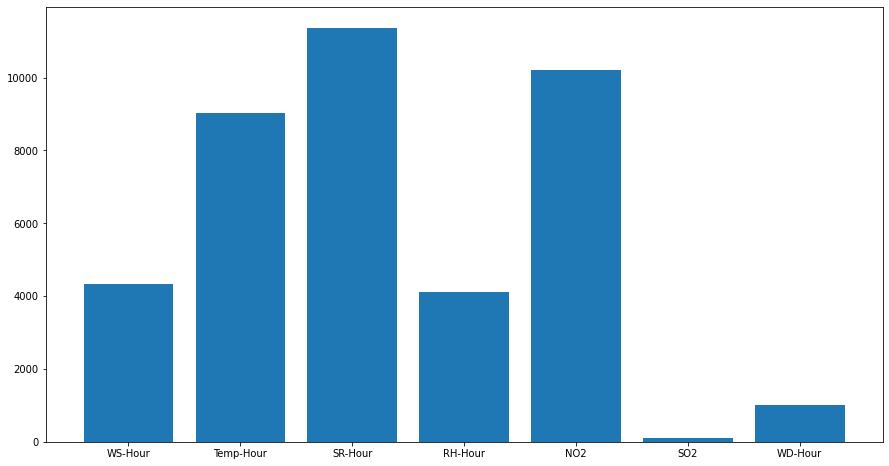

In [5]:
from sklearn import preprocessing
x_1= df[['WS-Hour','Temp-Hour', 'SR-Hour' ,'RH-Hour', 'NO2','SO2','WD-Hour']]
y_2=df[['O3']]
#y_2 = np.ravel(df[['O3']])
scaled_inputs = preprocessing.scale(x_1)
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x_1,y_2)
plt.figure(figsize= (15,8))
plt.bar(x=x_1.columns,height=fit.scores_)
plt.show()

In [6]:
x_train, x_val, y_train, y_val = train_test_split(scaled_inputs,y_2,test_size=0.2,shuffle=True,random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs,y_2,test_size=0.1,shuffle=True,random_state = 42)

In [8]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(learning_rate= 0.05, n_estimators=600, depth=16, l2_leaf_reg = 0.5, loss_function='RMSE')
model.fit(x_train, y_train)

0:	learn: 0.0179969	total: 1.87s	remaining: 18m 40s
1:	learn: 0.0174021	total: 3.51s	remaining: 17m 28s
2:	learn: 0.0168146	total: 5.16s	remaining: 17m 5s
3:	learn: 0.0162696	total: 6.68s	remaining: 16m 35s
4:	learn: 0.0157662	total: 8.35s	remaining: 16m 33s
5:	learn: 0.0152786	total: 9.76s	remaining: 16m 6s
6:	learn: 0.0148207	total: 11.2s	remaining: 15m 50s
7:	learn: 0.0144051	total: 13s	remaining: 16m
8:	learn: 0.0140076	total: 14.2s	remaining: 15m 35s
9:	learn: 0.0136245	total: 15.6s	remaining: 15m 19s
10:	learn: 0.0132763	total: 16.9s	remaining: 15m 7s
11:	learn: 0.0129395	total: 18.3s	remaining: 14m 57s
12:	learn: 0.0126242	total: 19.5s	remaining: 14m 42s
13:	learn: 0.0123090	total: 20.7s	remaining: 14m 26s
14:	learn: 0.0120261	total: 21.9s	remaining: 14m 12s
15:	learn: 0.0117641	total: 23.1s	remaining: 14m 1s
16:	learn: 0.0115185	total: 24.5s	remaining: 13m 59s
17:	learn: 0.0112812	total: 25.9s	remaining: 13m 55s
18:	learn: 0.0110620	total: 27.2s	remaining: 13m 51s
19:	learn: 0.

154:	learn: 0.0058176	total: 3m 26s	remaining: 9m 51s
155:	learn: 0.0058049	total: 3m 27s	remaining: 9m 50s
156:	learn: 0.0057898	total: 3m 28s	remaining: 9m 48s
157:	learn: 0.0057787	total: 3m 29s	remaining: 9m 46s
158:	learn: 0.0057596	total: 3m 30s	remaining: 9m 44s
159:	learn: 0.0057500	total: 3m 31s	remaining: 9m 42s
160:	learn: 0.0057385	total: 3m 33s	remaining: 9m 41s
161:	learn: 0.0057306	total: 3m 34s	remaining: 9m 39s
162:	learn: 0.0057233	total: 3m 35s	remaining: 9m 37s
163:	learn: 0.0057155	total: 3m 36s	remaining: 9m 35s
164:	learn: 0.0056999	total: 3m 37s	remaining: 9m 34s
165:	learn: 0.0056785	total: 3m 38s	remaining: 9m 32s
166:	learn: 0.0056671	total: 3m 40s	remaining: 9m 30s
167:	learn: 0.0056545	total: 3m 41s	remaining: 9m 29s
168:	learn: 0.0056453	total: 3m 42s	remaining: 9m 27s
169:	learn: 0.0056331	total: 3m 43s	remaining: 9m 25s
170:	learn: 0.0056272	total: 3m 44s	remaining: 9m 23s
171:	learn: 0.0056094	total: 3m 45s	remaining: 9m 22s
172:	learn: 0.0055947	total:

307:	learn: 0.0041695	total: 6m 40s	remaining: 6m 19s
308:	learn: 0.0041568	total: 6m 41s	remaining: 6m 18s
309:	learn: 0.0041486	total: 6m 42s	remaining: 6m 16s
310:	learn: 0.0041362	total: 6m 44s	remaining: 6m 15s
311:	learn: 0.0041256	total: 6m 45s	remaining: 6m 14s
312:	learn: 0.0041165	total: 6m 46s	remaining: 6m 12s
313:	learn: 0.0041073	total: 6m 47s	remaining: 6m 11s
314:	learn: 0.0041021	total: 6m 49s	remaining: 6m 10s
315:	learn: 0.0040948	total: 6m 50s	remaining: 6m 8s
316:	learn: 0.0040882	total: 6m 51s	remaining: 6m 7s
317:	learn: 0.0040814	total: 6m 53s	remaining: 6m 6s
318:	learn: 0.0040721	total: 6m 54s	remaining: 6m 5s
319:	learn: 0.0040629	total: 6m 55s	remaining: 6m 3s
320:	learn: 0.0040560	total: 6m 57s	remaining: 6m 2s
321:	learn: 0.0040471	total: 6m 58s	remaining: 6m 1s
322:	learn: 0.0040384	total: 6m 59s	remaining: 6m
323:	learn: 0.0040268	total: 7m 1s	remaining: 5m 58s
324:	learn: 0.0040206	total: 7m 2s	remaining: 5m 57s
325:	learn: 0.0040127	total: 7m 3s	remain

460:	learn: 0.0030584	total: 10m 13s	remaining: 3m 4s
461:	learn: 0.0030541	total: 10m 14s	remaining: 3m 3s
462:	learn: 0.0030506	total: 10m 15s	remaining: 3m 2s
463:	learn: 0.0030457	total: 10m 16s	remaining: 3m
464:	learn: 0.0030378	total: 10m 17s	remaining: 2m 59s
465:	learn: 0.0030314	total: 10m 18s	remaining: 2m 57s
466:	learn: 0.0030252	total: 10m 20s	remaining: 2m 56s
467:	learn: 0.0030171	total: 10m 21s	remaining: 2m 55s
468:	learn: 0.0030100	total: 10m 22s	remaining: 2m 53s
469:	learn: 0.0030051	total: 10m 23s	remaining: 2m 52s
470:	learn: 0.0030001	total: 10m 24s	remaining: 2m 50s
471:	learn: 0.0029959	total: 10m 25s	remaining: 2m 49s
472:	learn: 0.0029876	total: 10m 26s	remaining: 2m 48s
473:	learn: 0.0029823	total: 10m 27s	remaining: 2m 46s
474:	learn: 0.0029787	total: 10m 29s	remaining: 2m 45s
475:	learn: 0.0029734	total: 10m 30s	remaining: 2m 44s
476:	learn: 0.0029688	total: 10m 31s	remaining: 2m 42s
477:	learn: 0.0029641	total: 10m 32s	remaining: 2m 41s
478:	learn: 0.002

In [9]:
y_pred  = model.predict(x_train)
r2_score(y_train, y_pred)

0.9833008120793807

In [10]:
from sklearn.metrics import r2_score
y_pred  = model.predict(x_val)
r2_score(y_val, y_pred)

0.893713460969305

In [11]:
from sklearn.metrics import r2_score
y_pred  = model.predict(x_test)
r2_score(y_test, y_pred)

0.8030994456442724

In [12]:
import pickle
pickle_out = open("model_cat.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [15]:
model.predict([[2,3,4,1,1,1,1]])


array([0.02848895])

In [16]:
pickle.dump(model,open('model_cat2.pkl','wb'))